In [1]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'daily_ice_edge.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


ModuleNotFoundError: No module named 'pandas'

In [ ]:
import numpy as np
from datetime import datetime
from scipy.optimize import curve_fit

In [ ]:


# Convert the date column to numerical values (days since the first date)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Function to model the trigonometric behavior
def trigonometric_model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Initialize a dictionary to store the model parameters for each longitude
model_parameters = {}

# Fit the model for each longitude column
for col in data.columns:
    if 'longitude_' in col:
        x_data = data['Days'].values
        y_data = data[col].values

        # Initial guess for the parameters A, B, C, D
        initial_guess = [1, 2 * np.pi / 365.25, 0, np.mean(y_data)]

        try:
            # Fit the curve
            params, _ = curve_fit(trigonometric_model, x_data, y_data, p0=initial_guess)
            model_parameters[col] = params
        except RuntimeError:
            # If the fit fails, record NaNs
            model_parameters[col] = [np.nan, np.nan, np.nan, np.nan]

# Convert the model parameters to a DataFrame for easier inspection
model_params_df = pd.DataFrame(model_parameters, index=['A', 'B', 'C', 'D'])


model_params_df.head()


,longitude_0E,longitude_1E,longitude_2E,longitude_3E,longitude_4E,longitude_5E,longitude_6E,longitude_7E,longitude_8E,longitude_9E,...,longitude_351E,longitude_352E,longitude_353E,longitude_354E,longitude_355E,longitude_356E,longitude_357E,longitude_358E,longitude_359E,longitude_360E
A,-7.937795,-8.101459,-8.117168,-8.090954,-8.140378,-8.155187,-8.162164,-8.156818,-8.151767,-8.129027,...,-7.399591,-7.478389,-7.519261,-7.590703,-7.648343,-7.772525,-7.944522,-7.997384,-7.701762,-7.750106
B,0.017205,0.017205,0.017206,0.017206,0.017206,0.017205,0.017205,0.017205,0.017207,0.017206,...,0.017200,0.017200,0.017200,0.017201,0.017202,0.017203,0.017204,0.017204,0.017204,0.017205
C,5.476563,5.480336,5.476592,5.471913,5.466998,5.455895,5.447335,5.437527,5.422158,5.422643,...,5.555542,5.553095,5.548846,5.542428,5.531223,5.520518,5.513026,5.503052,5.480880,5.474847
D,-62.464256,-62.561671,-62.570291,-62.555173,-62.568372,-62.530703,-62.490496,-62.433030,-62.380209,-62.306358,...,-62.415366,-62.406319,-62.393437,-62.389766,-62.398651,-62.424358,-62.483181,-62.509311,-62.330674,-62.361984


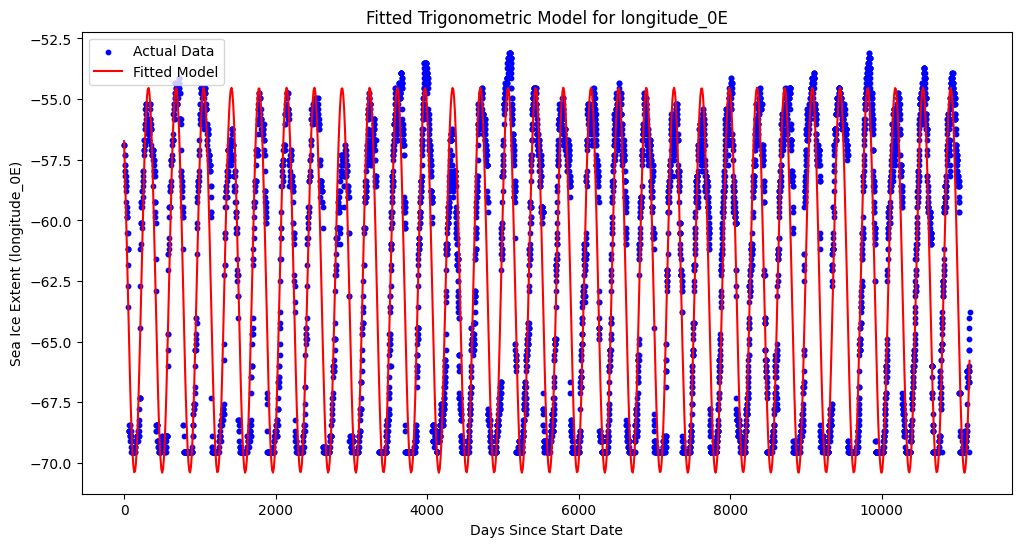

In [ ]:
import matplotlib.pyplot as plt

# Extract the data for longitude_0E
x_data = data['Days'].values
y_data = data['longitude_0E'].values
params = model_parameters['longitude_0E']

# Generate the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = trigonometric_model(x_fit, *params)

# Plot the actual data and the fitted model
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Actual Data', color='blue', s=10)
plt.plot(x_fit, y_fit, label='Fitted Model', color='red')
plt.xlabel('Days Since Start Date')
plt.ylabel('Sea Ice Extent (longitude_0E)')
plt.title('Fitted Trigonometric Model for longitude_0E')
plt.legend()
plt.show()
